# Домашняя работа №2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pylab

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from scipy.misc import derivative, electrocardiogram
from scipy.optimize import minimize, approx_fprime, fmin, brute
from scipy.signal import find_peaks

%matplotlib inline

### Задание 1

Придумайте функции со следующими свойствами в a) b) c) область определения X любая, какая вам удобна, главное - функция с нужными свойствами):

a) бесконечное количество локальных экстремумов

b) 2 локальных экстремума

с) 3 локальных экстремума

d*) область определения функции - 1 точка

In [16]:
def f(x):
    return 2 * np.cos(x)*x

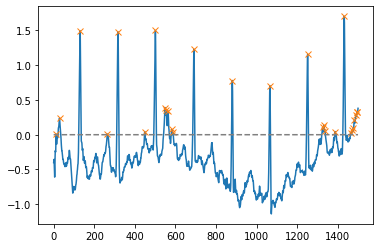

In [47]:
#a

x = electrocardiogram()[1000:2500]
peaks, _ = find_peaks(x, height=0)
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.plot(np.zeros_like(x), "--", color="gray")
plt.show()

Optimization terminated successfully.
         Current function value: -6.576743
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: -1.122193
         Iterations: 16
         Function evaluations: 32


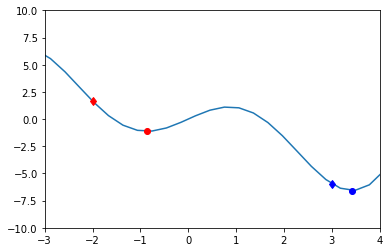

In [43]:
#b

x0 = 3 
xmin0 = fmin(f,x0)

x1 = -2 
xmin1 = fmin(f,x1)

x = np.linspace(-15,15,100)
y = f(x)
pylab.plot(x,y)
pylab.plot(x0, f(x0), 'bd', xmin0, f(xmin0), 'bo')
pylab.plot(x1, f(x1), 'rd', xmin1, f(xmin1), 'ro')

pylab.axis([-3,4,-10,10])
pylab.show()

Optimization terminated successfully.
         Current function value: -6.576743
         Iterations: 19
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: -12.722008
         Iterations: 17
         Function evaluations: 34
Optimization terminated successfully.
         Current function value: -18.954589
         Iterations: 17
         Function evaluations: 34


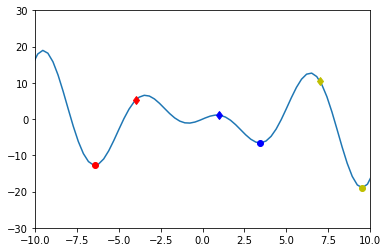

In [40]:
#c

x0 = 1 
xmin0 = fmin(f,x0)

x1 = -4 
xmin1 = fmin(f,x1)

x2 = 7 
xmin2 = fmin(f,x2)

x = np.linspace(-15,15,100)
y = f(x)
pylab.plot(x,y)
pylab.plot(x0, f(x0), 'bd', xmin0, f(xmin0), 'bo')
pylab.plot(x1, f(x1), 'rd', xmin1, f(xmin1), 'ro')
pylab.plot(x2, f(x2), 'yd', xmin2, f(xmin2), 'yo')

pylab.axis([-10,10,-30,30])
pylab.show()

#d

корень минус икс в степени 2

### Задание 2

Посчитайте 1-ую и 2-ую производные функции (на бумажке):

$f(x) = sin^2(2x+1)$


In [2]:
# во вложении к домашней работе

### Задание 3: 
Посчитайте частные производные функции в точкe
(на бумажке или в LaTeX и на numpy):

$f(x,y)=2x^2y^3 + 1/x + y^2x + 7$ в точке $(1,2)$

In [2]:
# во вложении к домашней работе

In [3]:
from sympy import *
from scipy import optimize

In [4]:
def func(x, c0, c1):
    "Coordinate vector `x` should be an array of size two."
    return c0 * x[0]**2 + c1 * x[1]**2

In [5]:
x, y = symbols('x y')
r = diff(2*x**2*y**3 + 1/x + y**2*x + 7, x)
t = diff(2*x**2*y**3 + 1/x + y**2*x + 7, y)

In [6]:
r

4*x*y**3 + y**2 - 1/x**2

In [7]:
t

6*x**2*y**2 + 2*x*y

In [8]:
x = [r, t]
print(x)

[4*x*y**3 + y**2 - 1/x**2, 6*x**2*y**2 + 2*x*y]


In [10]:
c0, c1 = (1, 2)
eps = np.sqrt(np.finfo(float).eps)
i = optimize.approx_fprime(x, func, [eps, eps], c0, c1)
i

ValueError: The user-provided objective function must return a scalar value.

In [11]:
# 4*1*2**3+2**2-1/1**2

35.0

In [12]:
# 6*1**2*2**2+2*1*2

28

### Задание 4:

Градиентный спуск своими руками

In [38]:
def f(x):
    return (x[0]**2) + (x[1]**2)

In [51]:
x = np.array([100, 200])
lr = 0.1

In [52]:
for i in range(100):
    x = x - lr * approx_fprime(x, f, 1e-6)

In [53]:
x = np.array([100, 200])
res = minimize(f, x, method='nelder-mead',
    options={'xtol': 1e-8, 'disp': True})

print(res.x)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 85
         Function evaluations: 164
[ 3.31391559e-09 -1.82888492e-09]


In [54]:
print("Минимум достигается в: ", x)
print("Значение функции в минимуме: ", f(x))

Минимум достигается в:  [100 200]
Значение функции в минимуме:  50000


Проверка с помощью встроенной функции scipy: 